<a href="https://colab.research.google.com/github/ramansandhu17/A-B-Testing/blob/main/Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)
n_emails=100

#expectation for open rate for A group
open_rate_a=0.24

#expectation for open rate for B group
open_rate_b=0.32

#simuated opens(1=open, 0=not opened)
opens_a=np.random.binomial(1,open_rate_a,n_emails)
opens_b=np.random.binomial(1,open_rate_b,n_emails)

#Create a dataframe
df=pd.DataFrame({
    'EmailID':range(1,2*n_emails+1),
    'Group':['A']*n_emails+['B']*n_emails,
    'SubjectLine':['Following up on our last conversation']*n_emails+['Fresh flavors just arrived']*n_emails,
    'Opened':np.concatenate([opens_a,opens_b])
})


In [3]:
#group the data into A and B
summary = df.groupby('Group')['Opened'].agg(['count', 'sum'])

summary.columns = ['Emails Sent', 'Emails Opened']
summary['Open Rate (%)'] = (summary['Emails Opened'] / summary['Emails Sent']) * 100
summary


,Emails Sent,Emails Opened,Open Rate (%)
Group,,,
A,100,24,24.0
B,100,31,31.0


In [4]:
#Run the A/B Test

from statsmodels.stats.proportion import proportions_ztest

opened_a=df[df['Group']=='A']['Opened'].sum()
opened_b=df[df['Group']=='B']['Opened'].sum()

successes=[opened_a,opened_b]
totals=[n_emails,n_emails]

#Run the test
z_score,p_value=proportions_ztest(successes,totals)

print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")


Z-score: -1.1085306154508543
P-value: 0.26763272469108135


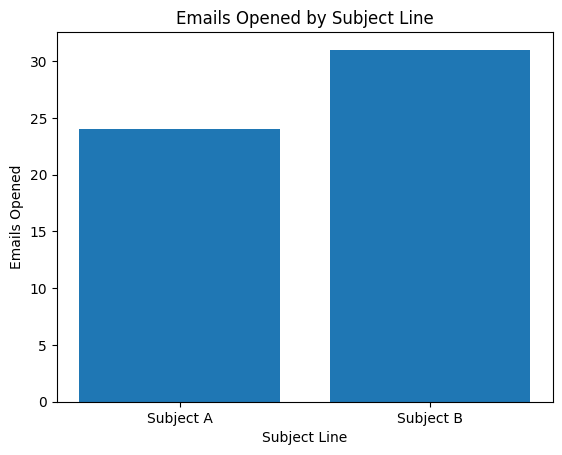

In [7]:
import matplotlib.pyplot as plt

plt.bar(['Subject A','Subject B'],[opened_a,opened_b])
plt.xlabel('Subject Line')
plt.ylabel('Emails Opened')
plt.title('Emails Opened by Subject Line')
plt.show()